<a href="https://colab.research.google.com/github/fpabi/Tareas/blob/main/Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
from google.colab import files
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving cust_seg.csv to cust_seg.csv


In [3]:
customers=pd.read_csv(io.BytesIO(uploaded["cust_seg.csv"]),sep=',',decimal='.')
customers.shape

(850, 10)

In [4]:
customers.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
customers_bien = customers.loc[:, ~customers.columns.str.contains('^Unnamed')]


In [6]:
customers_bien = customers_bien.set_index("Customer Id")
customers_bien.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [7]:
valores_faltantes = customers_bien.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)


Valores faltantes por columna:
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


In [10]:
# Crear un DataFrame con filas sin valores faltantes
customers_sin_faltantes = customers_bien.dropna()

# Crear un DataFrame con filas que contienen valores faltantes
customers_con_faltantes = customers_bien[customers_bien.isnull().any(axis=1)]


In [11]:
customers_sin_faltantes.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [12]:
customers_con_faltantes.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
6,40,1,23,81,0.998,7.831,NaN,10.9
9,26,1,5,18,0.575,2.215,NaN,15.5
12,34,2,9,40,0.374,0.266,NaN,1.6
14,46,1,6,30,1.415,3.865,NaN,17.6
16,24,1,1,16,0.185,1.287,NaN,9.2


In [8]:
customers_bien.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


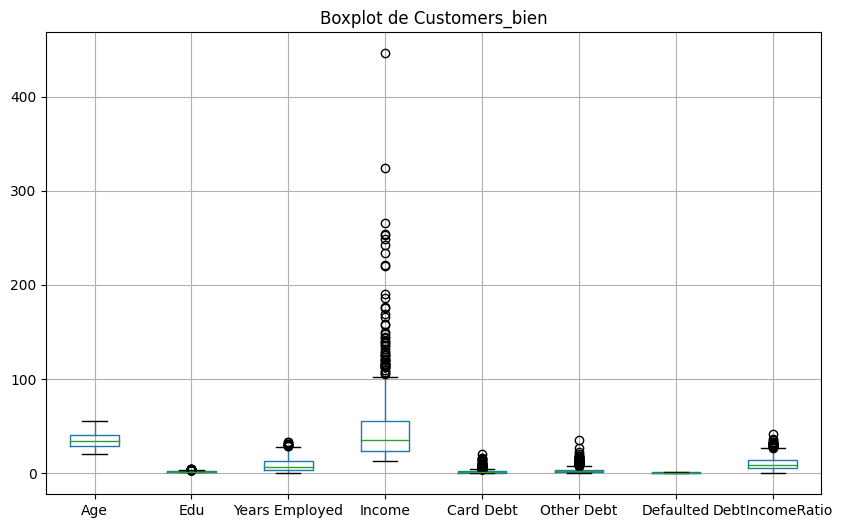

In [13]:
customers_bien.boxplot(figsize=(10, 6))
plt.title('Boxplot de Customers_bien')
plt.show()

<Axes: >

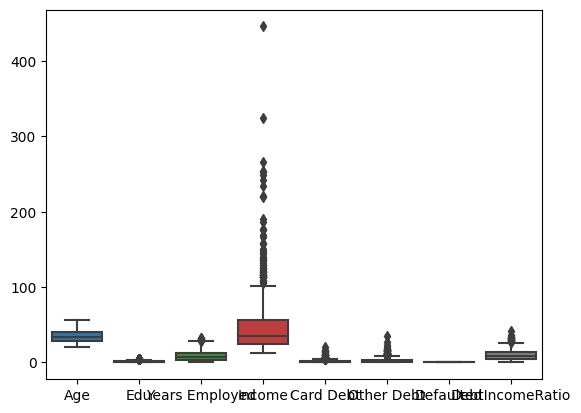

In [14]:
sns.boxplot(customers_bien)

In [13]:
duplicados_sf = customers_sin_faltantes.duplicated().sum()
duplicados_cf = customers_con_faltantes.duplicated().sum()

print("Número de filas duplicadas:", duplicados_cf)
print("Número de filas duplicadas:", duplicados_sf)


Número de filas duplicadas: 0
Número de filas duplicadas: 0


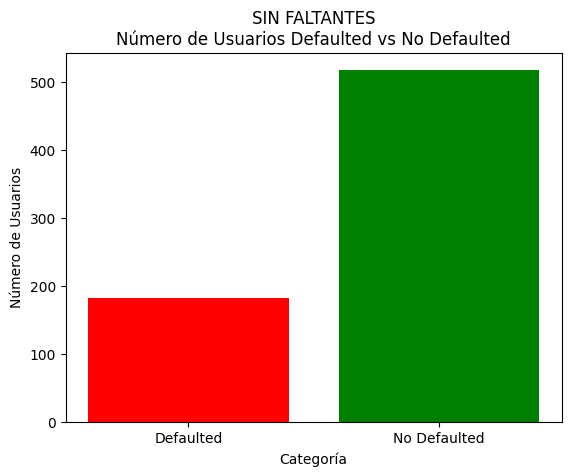

In [16]:
defaulted_count = customers_sin_faltantes[customers_sin_faltantes['Defaulted'] == 1]['Defaulted'].count()
non_defaulted_count = customers_sin_faltantes[customers_sin_faltantes['Defaulted'] == 0]['Defaulted'].count()

# Crear una lista con las categorías y otra con los valores correspondientes
categorias = ['Defaulted', 'No Defaulted']
valores = [defaulted_count, non_defaulted_count]

# Crear un gráfico de barras
plt.bar(categorias, valores, color=['red', 'green'])
plt.title('SIN FALTANTES\nNúmero de Usuarios Defaulted vs No Defaulted')
plt.xlabel('Categoría')
plt.ylabel('Número de Usuarios')
plt.show()

In [17]:
correlation=customers_bien.corr()
correlation

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Age,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.137657,0.008240
Edu,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.114676,0.008053
Years Employed,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.282978,-0.033625
Income,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.070970,-0.035585
Card Debt,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.244734,0.514971
Other Debt,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.145716,0.572545
Defaulted,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.389575,1.000000


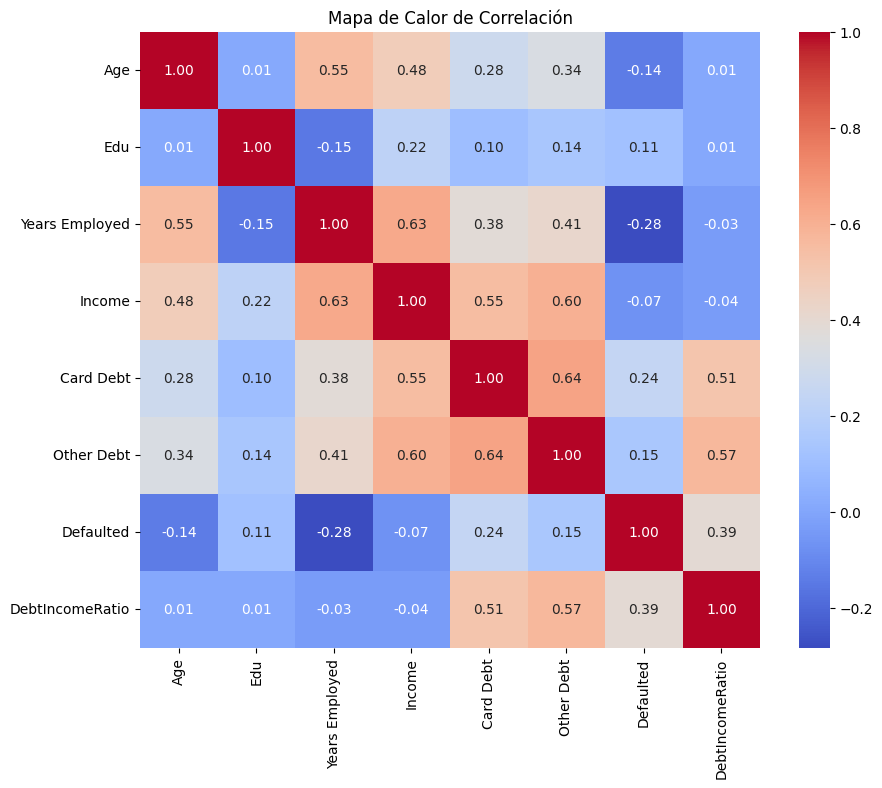

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

In [19]:
correlation1=customers_sin_faltantes.corr()
correlation1

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Age,1.000000,0.022325,0.536497,0.478710,0.295214,0.340213,-0.137657,0.016398
Edu,0.022325,1.000000,-0.153621,0.235190,0.088277,0.165458,0.114676,0.008838
Years Employed,0.536497,-0.153621,1.000000,0.619681,0.403698,0.406089,-0.282978,-0.031182
Income,0.478710,0.235190,0.619681,1.000000,0.570196,0.610663,-0.070970,-0.026777
Card Debt,0.295214,0.088277,0.403698,0.570196,1.000000,0.633108,0.244734,0.501772
Other Debt,0.340213,0.165458,0.406089,0.610663,0.633108,1.000000,0.145716,0.584867
Defaulted,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.016398,0.008838,-0.031182,-0.026777,0.501772,0.584867,0.389575,1.000000


In [20]:
correlation2=customers_con_faltantes.corr()
correlation2

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Age,1.000000,-0.022328,0.623339,0.466937,0.202475,0.330234,NaN,-0.024767
Edu,-0.022328,1.000000,-0.133883,0.168429,0.152801,0.047314,NaN,-0.000997
Years Employed,0.623339,-0.133883,1.000000,0.641891,0.287217,0.445515,NaN,-0.036738
Income,0.466937,0.168429,0.641891,1.000000,0.488870,0.581922,NaN,-0.065166
Card Debt,0.202475,0.152801,0.287217,0.488870,1.000000,0.695712,NaN,0.590957
Other Debt,0.330234,0.047314,0.445515,0.581922,0.695712,1.000000,NaN,0.538569
Defaulted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DebtIncomeRatio,-0.024767,-0.000997,-0.036738,-0.065166,0.590957,0.538569,NaN,1.000000


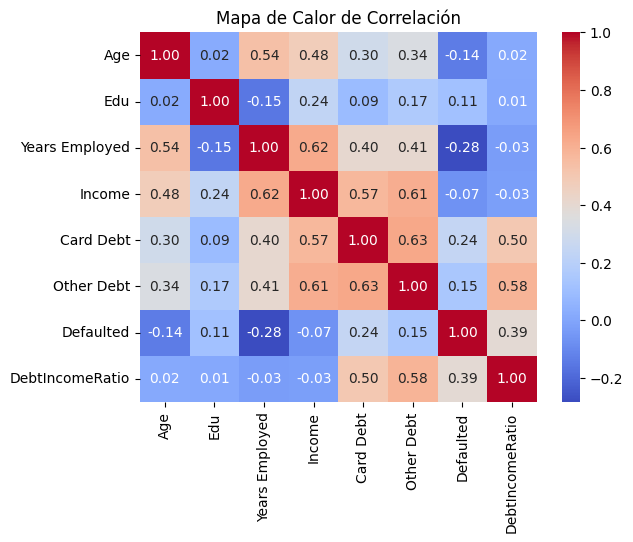

In [21]:
sns.heatmap(correlation1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

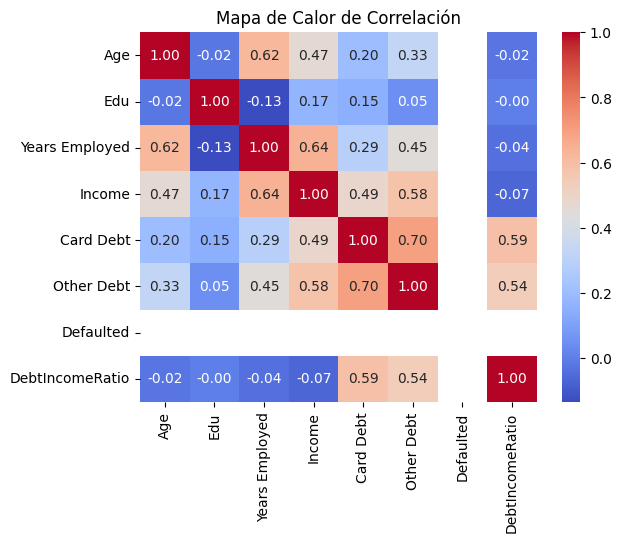

In [22]:
sns.heatmap(correlation2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

In [23]:
customers_bien.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [24]:
customers_bien[customers_bien['Defaulted']==0].shape

(517, 8)